In [49]:
import sklearn; 
print(sklearn.__version__)

0.23.1


In [50]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Question 1

In [51]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
student_data = pd.read_csv(data_path, delimiter = ',')

In [52]:
student_data.head(5)

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [53]:
student_data.tail()

,revision_time,exam_score
45,45.213,76.957
46,45.397,78.698
47,46.923,90.384
48,47.818,94.945
49,48.011,86.968


In [5]:
student_data.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [6]:
len(student_data)

50

In [7]:
X = student_data.drop(columns="exam_score")
Phi = np.c_[np.ones((len(X), 1)), X]
y = student_data["exam_score"]

In [8]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(Phi, y)
lreg.coef_

NameError: name 'Phi' is not defined

In [9]:
print(17.8977 + 10*1.4411)
lreg.predict(np.array([1, 10]).reshape(1,-1))

32.3087


array([32.30908931])

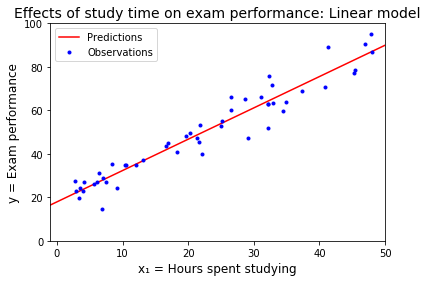

In [10]:
X_coords = np.linspace(-1, 50)
Phi_coords = np.c_[np.ones((len(X_coords), 1)), X_coords]
pred, = plt.plot(X_coords, lreg.predict(Phi_coords), "r-")
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
pred.set_label("Predictions")
plt.legend()
plt.axis([-1, 50, 0, 100])
plt.xlabel("x\N{SUBSCRIPT ONE} = Hours spent studying", fontsize=12)
plt.ylabel("y = Exam performance", fontsize=12)
plt.title("Effects of study time on exam performance: Linear model", fontsize=14)
plt.show()

In [11]:
# Phi is our nx2 design matrix, y our nx1 target vector
gramian_matrix_of_phi = np.dot(Phi.T, Phi)
inverse_of_gramian    = np.linalg.inv(gramian_matrix_of_phi)
pseudo_inverse_of_phi = np.dot(inverse_of_gramian, Phi.T)
estimated_weights     = np.dot(pseudo_inverse_of_phi, y)
estimated_weights

array([17.89768026,  1.44114091])

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lreg.predict(Phi))

NameError: name 'Phi' is not defined

In [13]:
def mse(Phi, weights):
    squared_error_sum = 0
    for i in range(len(Phi)):
        yi_pred = sum(Phi[i] * weights)
        squared_error_sum += (yi_pred - y[i])**2
    return 1/len(Phi) * squared_error_sum
mse(Phi,estimated_weights)

30.985472614541287

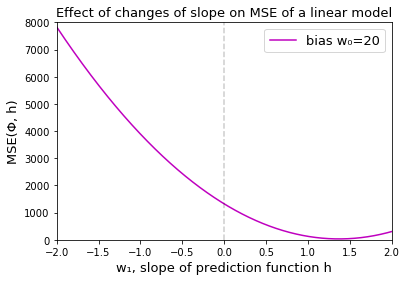

1.3726745349069813


In [14]:
w0 = 20
w1 = np.linspace(-2, 2, 5000)
error, = plt.plot(w1, [mse(Phi, [w0, w1[i]]) for i in range(5000)], "m-")
error.set_label("bias w\N{SUBSCRIPT ZERO}=20")
plt.plot([0, 0], [0, 8000], "k--", alpha=0.2)
plt.axis([-2, 2, 0, 8000])
plt.xlabel("w\N{SUBSCRIPT ONE}, slope of prediction function h", fontsize=13)
plt.ylabel("MSE(\N{GREEK CAPITAL LETTER PHI}, h)", fontsize=13)
plt.title("Effect of changes of slope on MSE of a linear model", fontsize=13)
plt.legend(fontsize=13)
plt.show()
print(w1[np.argmin([mse(Phi, [w0, w1[i]]) for i in range(5000)])])

### Question 2

In [39]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
reg_data = pd.read_csv(data_path, delimiter = ',')

In [40]:
reg_data.head(5)

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [41]:
reg_data.describe()

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


In [42]:
X = reg_data.drop(columns=["output"])
y = reg_data["output"]

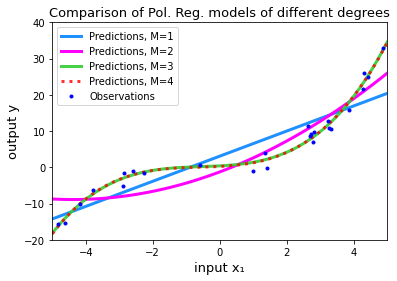

In [43]:
from sklearn.preprocessing import PolynomialFeatures 

models = []
Phi_polys = []
colours = ["dodgerblue", "fuchsia", "limegreen", "r"] 
alphas = [1, 1, 0.9, 0.8]

for M in range(1,5):
    poly_features = PolynomialFeatures(degree=M, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    Phi_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]
    Phi_polys.append(Phi_poly)
    
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(Phi_poly, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_poly = poly_features.transform(np.array(X_coords).reshape(-1, 1))
    Phi_coords_poly = np.c_[np.ones((len(X_coords_poly), 1)), X_coords_poly]
    y_predict = lin_reg.predict(Phi_coords_poly)
    
    if (M != 4):
        pred, = plt.plot(X_coords, y_predict, colours[M-1], alpha=alphas[M-1])
    else:
        pred, = plt.plot(X_coords, y_predict, "r:", alpha=alphas[M-1])
        
    pred.set_label("Predictions, M=" + str(M))
    
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(3.)
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x\N{SUBSCRIPT ONE}", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Comparison of Pol. Reg. models of different degrees", fontsize=13)
for line in plt.gca().lines:
    line.set_linewidth(3.)
plt.show()

In [44]:
errors = [mean_squared_error(y, models[i].predict(Phi_polys[i])) for i in range(len(models))]
errors

[24.744378032672856,
 17.352926937873296,
 2.7447567192524276,
 2.7389111790755383]

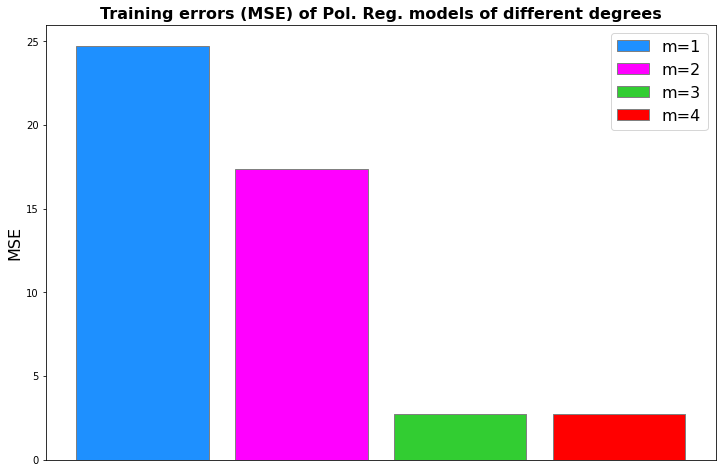

In [45]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
heights = [[error] for error in errors]
   
# Set position of bar on X axis 
brs = [0, 0.3, 0.6, 0.9]
   
# Make the plot 
for i in range(len(models)):
    plt.bar(brs[i], heights[i], color =colours[i], width = barWidth, 
        edgecolor ='grey', label ="m=" + str(i+1)) 
    
plt.ylabel('MSE', fontsize=16) 
plt.xticks([]) 
plt.legend(prop={'size': 16})
plt.title("Training errors (MSE) of Pol. Reg. models of different degrees", fontsize=16, fontweight="bold")
plt.show() 

In [46]:
def single_rbf(x, c, alpha):
    return np.exp((-1/2) * (x-c)**2 / alpha**2)

def group_rbf(x, alpha):
    return [1, single_rbf(x, -4.0, alpha), single_rbf(x, -2.0, alpha),
            single_rbf(x, 2.0, alpha), single_rbf(x, 4.0, alpha)]

[1, 8.58716646651046e-90, 1.495289916360948e-23, 2.334166753175526e-21, 2.0924872986388428e-85]

[1, 0.999180006820097, 0.9997897935483654, 0.9998099915259917, 0.9992203785450484]

[1, 0.9999917967380648, 0.9999978977167288, 0.9999980997365264, 0.9999922007752361]



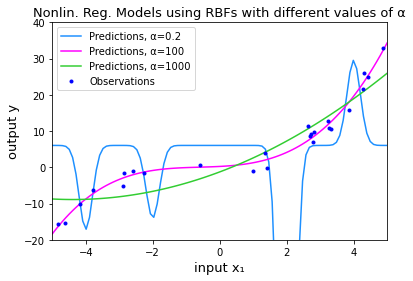

In [47]:
alphas = [0.2, 100, 1000]
models = []

for i in range(len(alphas)):
    alpha = alphas[i]
    X_rbf = [group_rbf(x, alpha) for x in X.values]
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_rbf, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_rbf = [group_rbf(x, alpha) for x in X_coords]
    y_predict = lin_reg.predict(X_coords_rbf)
    
    print(X_coords_rbf[50])
    print()
    
    pred, = plt.plot(X_coords, y_predict, colours[i])
    pred.set_label("Predictions, \N{GREEK SMALL LETTER ALPHA}=" + str(alpha))
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
plt.legend()
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x\N{SUBSCRIPT ONE}", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Nonlin. Reg. Models using RBFs with different values of \N{GREEK SMALL LETTER ALPHA}", fontsize=13)
plt.show()

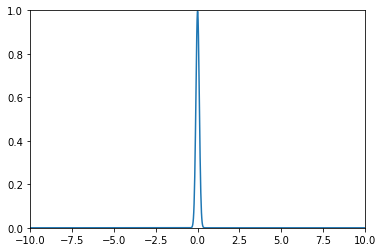

In [48]:
xs = np.linspace(-10, 10, 1000)
ys = [single_rbf(x, 0, 0.1) for x in xs]
plt.axis([-10, 10, 0, 1])
plt.plot(xs, ys)

### Question 3

In [76]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
faces_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
faces_test = pd.read_csv(data_path, delimiter = ',')

In [77]:
faces_train.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [78]:
faces_train.describe().to_string()

'                x0           y0           x1           y1           x2           y2           x3           y3           x4           y4           x5           y5           x6           y6           x7           y7           x8           y8           x9           y9          x10          y10          x11          y11          x12          y12          x13          y13          x14          y14          x15          y15          x16          y16          x17          y17          x18          y18          x19          y19          x20          y20          x21          y21          x22          y22          x23          y23          x24          y24          x25          y25          x26          y26          x27          y27          x28          y28          x29          y29          x30          y30          x31          y31          x32          y32          x33          y33          x34          y34          x35          y35          x36          y36          x37          y37      

In [79]:
faces_test.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556577,-1.742358,0.100410,-1.549113,-0.322024,...,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411,0.493333
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586,0.500164
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.000000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000,0.000000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000,0.000000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000,1.000000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000,1.000000


In [80]:
X_train = faces_train.drop(columns=["smiling"])
y_train = faces_train["smiling"]
X_test = faces_test.drop(columns=["smiling"])
y_test = faces_test["smiling"]

In [81]:
smilers = X_train[y_train == 1]
frowners = X_train[y_train == 0]

In [111]:
len(X_test[y_test == 1])/len(X_test)

0.49333333333333335

In [82]:
smiler_x_cols = [smilers["x" + str(i)] for i in range(68)]
smiler_x_means = [col.mean() for col in smiler_x_cols]
smiler_y_cols = [smilers["y" + str(i)] for i in range(68)]
smiler_y_means = [col.mean() for col in smiler_y_cols]

frowner_x_cols = [frowners["x" + str(i)] for i in range(68)]
frowner_x_means = [col.mean() for col in frowner_x_cols]
frowner_y_cols = [frowners["y" + str(i)] for i in range(68)]
frowner_y_means = [col.mean() for col in frowner_y_cols]

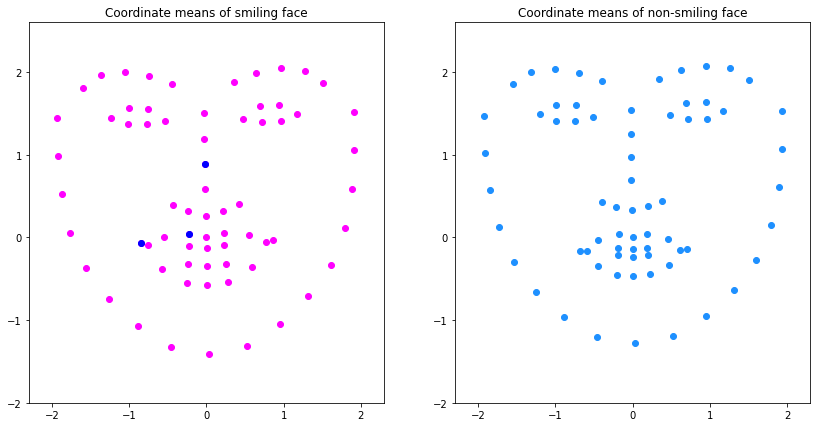

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

ax[0].scatter(smiler_x_means, smiler_y_means, c="fuchsia")
ax[0].axis([-2.3, 2.3, -2, 2.6])
ax[0].title.set_text("Coordinate means of smiling face")

ax[0].scatter(smiler_x_means[50], smiler_y_means[50], c="b")
ax[0].scatter(smiler_x_means[48], smiler_y_means[48], c="b")
ax[0].scatter(smiler_x_means[29], smiler_y_means[29], c="b")

ax[1].scatter(frowner_x_means, frowner_y_means, c="dodgerblue")
ax[1].axis([-2.3, 2.3, -2, 2.6])
ax[1].title.set_text("Coordinate means of non-smiling face")


plt.show()

In [87]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(max_depth=20, random_state=2001)
tree_reg.fit(X_train, y_train)

print(accuracy_score(y_train, tree_reg.predict(X_train)))
print(accuracy_score(y_test, tree_reg.predict(X_test)))
tree_reg.max_depth

1.0
0.815


20

In [239]:
imps = tree_reg.feature_importances_
(-imps).argsort()

array([100,  97,  59, 106,  98,  15,  17, 120, 129, 128,  65, 107, 125,
       108,   3,  77,   6, 109, 121, 104,  37,  19,  10,  61,  91,  49,
       131,   2, 135, 122,  99,  72, 110,  25,  45, 115,  29,  34,  63,
       123,  90,  28,  40, 127,  85,   1, 133,  43,  53,  67,  79,  57,
        69, 117,  87,   4,  23,  36, 132,  64,  82,  46,  44, 118, 105,
        21,  20,  22,  50,  26, 103, 102, 101,  27,  30,  24, 111, 116,
       113,   5, 130,   7,   8,   9, 126,  11, 112, 124,  13,  14,  16,
       119,  31,  18, 114,  12,  32,  92,  95,  70,  68, 134,  66,  41,
        42,  62,  60,  58,  56,  55,  54,  47,  52,  51,  71,  39,  73,
        74,  94,  93,  48,  33,  35,  89,  88,  96,  86,  83,  81,  80,
        78,  38,  76,  75,  84,   0], dtype=int64)

In [240]:
X_train.columns[100]

'x50'

In [241]:
print(smiler_x_means[50], smiler_y_means[50])

-0.22101241970021418 0.039740471092077095


In [242]:
X_train.columns[97]

'y48'

In [243]:
print(smiler_x_means[48], smiler_y_means[48])

-0.8539713062098501 -0.06510620985010707


In [244]:
X_train.columns[59]

'y29'

In [245]:
print(smiler_x_means[29], smiler_y_means[29])

-0.0251627408993576 0.8876334047109207


In [246]:
imps[100]

0.33040484928175073

### Question 4

In [112]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
alg_data = pd.read_csv(data_path, delimiter = ',')

In [113]:
alg_data.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [114]:
alg_data.describe()

,gt,alg_1,alg_2,alg_3,alg_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.202000,0.493739,0.518386,0.491591,0.743101
std,0.401693,0.383203,0.426419,0.304036,0.194130
min,0.000000,0.000000,0.000000,0.000000,0.167336
25%,0.000000,0.074081,0.000000,0.248341,0.597597
50%,0.000000,0.498969,0.549211,0.476655,0.760082
75%,0.000000,0.887967,1.000000,0.732685,0.919085
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
y = alg_data["gt"]
alg_1 = alg_data["alg_1"]
alg_2 = alg_data["alg_2"]
alg_3 = alg_data["alg_3"]
alg_4 = alg_data["alg_4"]
alg_1_bin = [int(x >= 0.5) for x in alg_1]
alg_2_bin = [int(x >= 0.5) for x in alg_2]
alg_3_bin = [int(x >= 0.5) for x in alg_3]
alg_4_bin = [int(x >= 0.5) for x in alg_4]

In [116]:
len(y[y > 0])

202

In [117]:
print(accuracy_score(y, alg_1_bin))
print(accuracy_score(y, alg_2_bin))
print(accuracy_score(y, alg_3_bin))
print(accuracy_score(y, alg_4_bin))

0.616
0.55
0.321
0.329


In [118]:
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y, alg_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y, alg_2)
fpr_3, tpr_3, thresholds_3 = roc_curve(y, alg_3)
fpr_4, tpr_4, thresholds_4 = roc_curve(y, alg_4)

In [119]:
from sklearn.metrics import roc_auc_score

ras_1 = roc_auc_score(y, alg_1)
ras_2 = roc_auc_score(y, alg_2)
ras_3 = roc_auc_score(y, alg_3)
ras_4 = roc_auc_score(y, alg_4)

print(ras_1)
print(ras_2)
print(ras_3)
print(ras_4)

0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644


In [97]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y, alg_1_bin))
print(precision_score(y, alg_2_bin))
print(precision_score(y, alg_3_bin))
print(precision_score(y, alg_4_bin))

0.318
0.2633587786259542
0.0
0.2313860252004582


In [98]:
print(recall_score(y, alg_1_bin))
print(recall_score(y, alg_2_bin))
print(recall_score(y, alg_3_bin))
print(recall_score(y, alg_4_bin))

0.7871287128712872
0.6831683168316832
0.0
1.0


In [106]:
def plot_roc_curve(fpr, tpr, colour="r", label=None):
    plt.plot(fpr, tpr, colour, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=13)
    plt.ylabel("True Positive Rate (Recall)", fontsize=13)
    
    plt.grid()

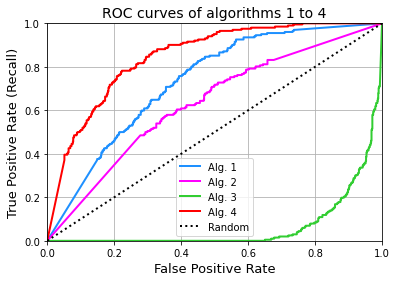

In [107]:
plot_roc_curve(fpr_1, tpr_1, colours[0], label="Alg. 1")
plot_roc_curve(fpr_2, tpr_2, colours[1], label="Alg. 2")
plot_roc_curve(fpr_3, tpr_3, colours[2], label="Alg. 3")
plot_roc_curve(fpr_4, tpr_4, colours[3], label="Alg. 4")
plot_roc_curve(np.linspace(0, 1, 100), np.linspace(0,1,100), "k:", label = "Random")
plt.legend()
plt.title("ROC curves of algorithms 1 to 4", fontsize=14)
plt.show()

0.9360499019826796


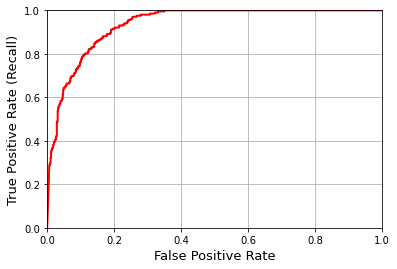

In [108]:
alg_3_inv = [1-x for x in alg_3]
ras_3_inv = roc_auc_score(y, alg_3_inv)
print(ras_3_inv)
fpr_3_inv, tpr_3_inv, thresholds_3_inv = roc_curve(y, alg_3_inv)
plot_roc_curve(fpr_3_inv, tpr_3_inv, label="Alg. 3 inv")